In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder


In [88]:
df=pd.read_csv(r'/kaggle/input/glass/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [89]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [91]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Text(0.5, 0.98, 'Visualizing columns')

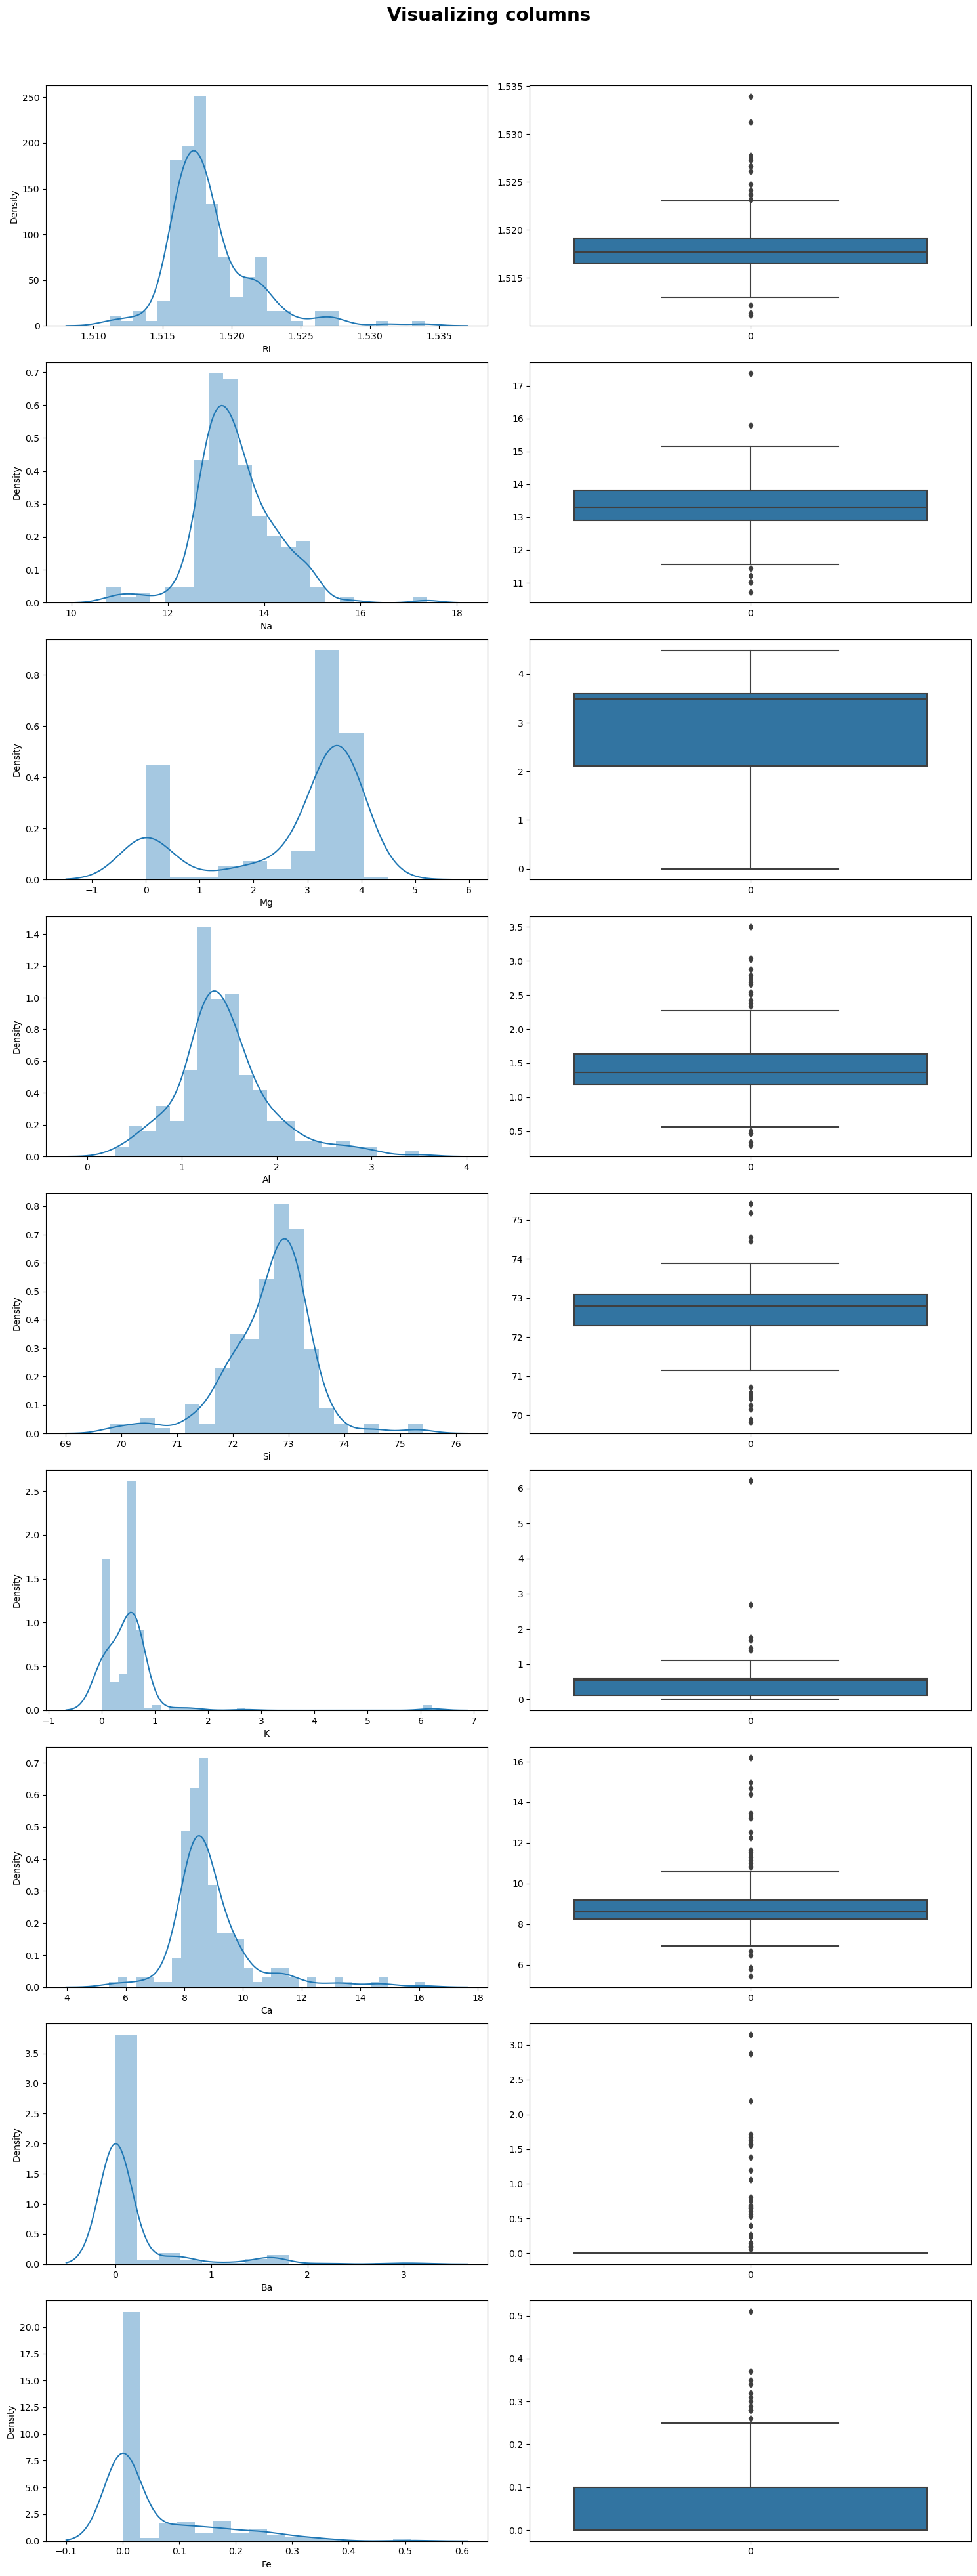

In [92]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(9, 2, figsize=(15,40))

# Exclusion of the `quality` feature by considering only the variable "float64"
for index, i in enumerate(df.select_dtypes(include=["float64"]).columns):
    sns.distplot(df[i], ax=ax[index, 0])
    sns.boxplot(df[i], ax=ax[index, 1])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing columns", fontweight="bold", fontsize=20)

<AxesSubplot:xlabel='Type', ylabel='count'>

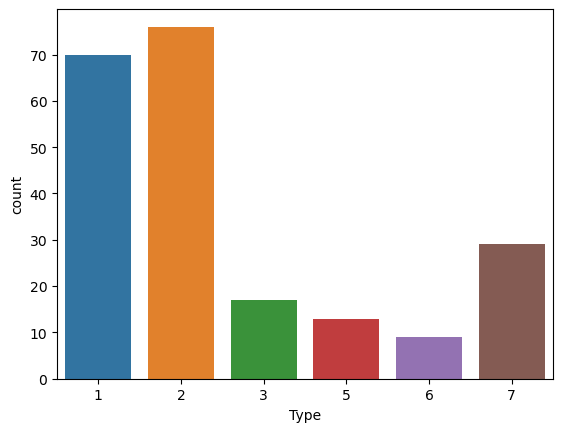

In [93]:
sns.countplot(data=df, x="Type")

In [94]:
import plotly.express as px

In [95]:
fig = px.imshow(df.corr(), color_continuous_scale="Blues")
fig.update_layout(height=600)
fig.show()

In [96]:
df_corr_bar = df.corr().Type.sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation="h", color_discrete_sequence=["#722F37"])
fig.update_layout(showlegend=False)
fig.show()

In [97]:
ln = LabelEncoder()

In [98]:
df['Type'] = df['Type'].astype('category')
print(df['Type'].cat.codes)
df.info()

0      0
1      0
2      0
3      0
4      0
      ..
209    5
210    5
211    5
212    5
213    5
Length: 214, dtype: int8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [99]:
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.model_selection import  train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    make_scorer,
    cohen_kappa_score
)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight

In [100]:
X = df.drop(["Type"], axis=1)
y = df["Type"]

In [101]:
le=LabelEncoder()
y=le.fit_transform(y)
set(y)

{0, 1, 2, 3, 4, 5}

In [102]:
fs = SelectKBest(score_func=f_classif, k="all")
fs.fit(X, y)

feature_contribution = (fs.scores_ / sum(fs.scores_)) * 100

RI : 0.86%
Na : 15.22%
Mg : 34.93%
Al : 19.04%
Si : 1.49%
K : 4.66%
Ca : 1.58%
Ba : 20.77%
Fe : 1.44%


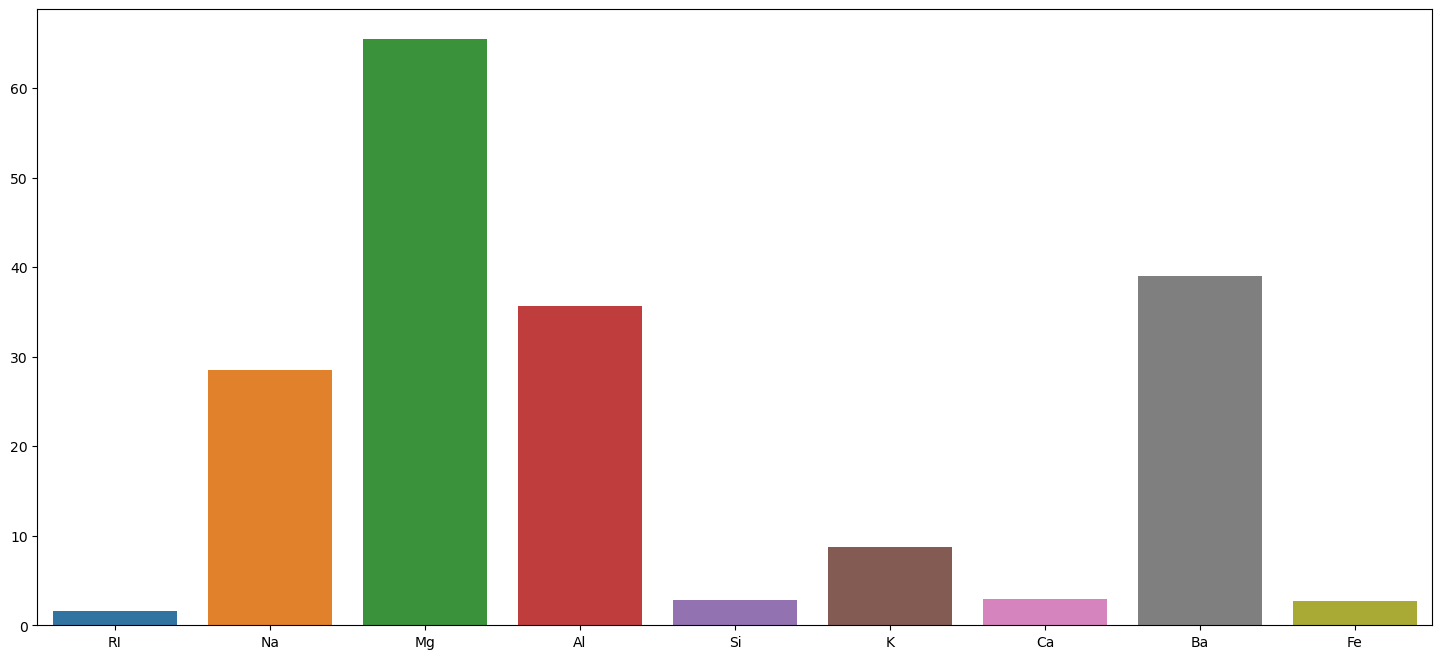

In [103]:
for i, j in enumerate(X.columns):
    print(f"{j} : {feature_contribution[i]:.2f}%")

plt.figure(figsize=(18, 8))
sns.barplot(x=X.columns, y=fs.scores_)
plt.show()

In [124]:
X_fs = X[
    [
        "Na",
        "Mg",
        "Al",
        "Ba",
        
    ]
]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fs, y, stratify=y, test_size=0.25, random_state=0
)

<AxesSubplot:ylabel='count'>

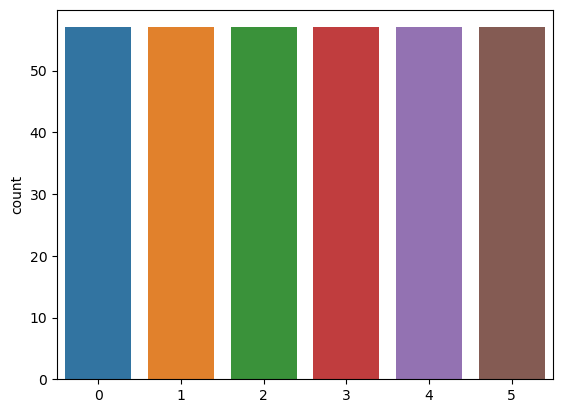

In [126]:
oversample = RandomOverSampler(random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
sns.countplot(data=X_train, x=y_train)

In [127]:
set(y_train)

{0, 1, 2, 3, 4, 5}

In [128]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        (accuracies.mean()),
    ]

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.47      0.50      0.49        18
           1       0.80      0.42      0.55        19
           2       0.00      0.00      0.00         4
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         2
           5       0.64      0.88      0.74         8

    accuracy                           0.48        54
   macro avg       0.40      0.41      0.39        54
weighted avg       0.56      0.48      0.50        54

------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.86      0.63      0.73        19
           2       0.00      0.00      0.00         4
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         2
     

In [130]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall,CV Accuracy
SVC(random_state=0),46.30%,51.11%,55.26%,58.33%,78.08%
LogisticRegression(random_state=0),48.15%,49.75%,51.74%,54.43%,76.62%
KNeighborsClassifier(),50.00%,49.11%,57.07%,51.33%,80.10%
GradientBoostingClassifier(),62.96%,46.68%,48.26%,47.05%,88.89%
RandomForestClassifier(random_state=0),57.41%,43.80%,46.64%,43.11%,87.43%
"XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None, colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None, interaction_constraints='', learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1, missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0, num_parallel_tree=1, objective='multi:softprob', predictor='auto', random_state=0, reg_alpha=0, ...)",51.85%,41.10%,42.75%,40.62%,87.43%
DecisionTreeClassifier(random_state=0),48.15%,39.11%,41.05%,40.17%,87.72%
AdaBoostClassifier(),33.33%,31.93%,36.01%,32.18%,52.63%
